In [6]:
import pandas as pd
import mysql.connector
import sqlite3
from IPython.display import Video
from IPython.display import YouTubeVideo
from IPython.display import display, HTML

# Establish the connection
cnx = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Nirmit@1234",
    database="job_vr"
)

# Create a cursor object
cursor = cnx.cursor()
login_successful = False

# 1. User Login

In [2]:
def user_login(email, password):
    cursor = cnx.cursor()
    
    # Check if the email and password match in the database
    query = "SELECT * FROM Job_Seekers WHERE email = %s AND password = %s"
    cursor.execute(query, (email, password))
    result = cursor.fetchone()
    
    if result:
        # Successful login
        display(HTML("<h3>Login Successful!</h3>"))
        return True
    else:
        # Invalid credentials
        display(HTML("<h3>Invalid Email or Password. Please try again.</h3>"))
        return False

# Take user input for email and password
email_input = input("Enter your email: ")
password_input = input("Enter your password: ")

# Call the login function with the provided credentials
login_successful = user_login(email_input, password_input)

Enter your email:  alexjohnson@email.com
Enter your password:  1234


In [3]:
# extracting the user's id i.e. job_seeker_id of the logged in user
def get_job_seeker_id(cursor, email):
        query = "SELECT job_seeker_id FROM Job_Seekers WHERE email = %s"
        cursor.execute(query, (email,))
        result = cursor.fetchone()
        if result:
            return result[0]
        else:
            return None
    
    # Get the job_seeker_id using the provided email
job_seeker_id = get_job_seeker_id(cursor, email_input)

# 2. To Find a job listing in a preferred industry and Location

In [4]:
if login_successful:
    # Define the city and industry
    city = input("Enter the preferred city you want the job in: ")
    industry = input("Enter the preferred Industry you want to work in: ")

    # Establish a new connection to the database (if needed)
    cursor = cnx.cursor()

    # Formulate the SQL queries
    query = (f"select job_title, company, job_description, salary, required_skills from Job_Listings "
              f"where location = '{city}' and industry = '{industry}'")

    # Execute the queries separately
    cursor.execute(query)
    rows = cursor.fetchall()

    # Display results for query 1
    count = 0 
    for row in rows:
        count=count+1

    if len(rows) > 0:
        print(f"\nResults for job listings in city {city} in {industry} industry:")
        for row in rows:
            job_title, company_name, job_description, salary, skills_required = row
            print("Job Title: ", job_title, "| Job Description: ", job_description)
            print("Company Name: ", company_name)
            print()
            print("Salary: ", salary)
            print("Skills Required: ", skills_required)
    else:
        print("\nNO RESULTS FOUND FOR THE CURRENT SEARCH")

else:
    display(HTML("<h3>You need to login first :(</h3>"))

Enter the preferred city you want the job in:  Austin
Enter the preferred Industry you want to work in:  Education



Results for job listings in city Austin in Education industry:
Job Title:  Content Creator | Job Description:  Create engaging educational content
Company Name:  EduTech

Salary:  75000.00
Skills Required:  Content creation, Education


# 3. To find current job seeker's applications

In [5]:
if login_successful: 
    # Formulate the SQL queries
    query = f"""
        select js.name, a.application_id, a.application_details, a.application_date, jl.job_title, jl.company, jl.job_description, jl.industry
        from applications a
        inner join job_listings jl on a.job_id = jl.job_id
        inner join job_seekers js on a.job_seeker_id = js.job_seeker_id
        where a.job_seeker_id = {job_seeker_id}
    """
    
    # Execute the queries separately
    cursor.execute(query)
    rows = cursor.fetchall()
       
    # Display results for query 1
    count = 0 
    for row in rows:
        count=count+1
    
    if len(rows) > 0:
        print(f"Job applications and associated job details for job seeker with ID {job_seeker_id}:")
        for row in rows:
            name, application_id, application_details, application_date, job_title, company, job_description, industry = row
            display(HTML(f"<h3>{name}</h3>"))
            print(f"\nApplication ID: {application_id}" ,f" | Application Date: {application_date}")
            print(f"Job Title: {job_title}")
            print(f"Application Details: {application_details}")
            print(f"Company: {company}")
            print(f"Job Description: {job_description}")
            print(f"Industry: {industry}")
            print("\n")
    else:
        print(f"No job applications found for job seeker with ID {job_seeker_id}")
else:
    display(HTML("<h3>You need to login first :(</h3>"))

Job applications and associated job details for job seeker with ID 15:



Application ID: 15  | Application Date: 2023-02-25
Job Title: Healthcare Administrator
Application Details: Experienced in healthcare administration
Company: Healthcare Solutions
Job Description: Oversee healthcare operations
Industry: Healthcare




# 4. Get the VR videos for different roles in selected industry

Available Industries:
Education
Finance
Healthcare
Technology


Enter an industry name:  Technology



Job Listings in Technology with VR video available:
VR ID: 5 
Job Title: Software Engineer



Enter a VR ID:  5



Playing video for the requested Job Title


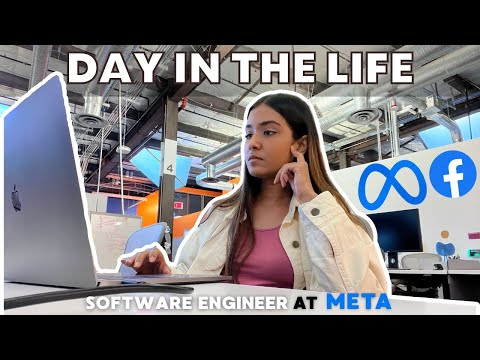

In [6]:
if login_successful:    
    # Display available industry names from the Industry table
    cursor.execute("SELECT industry_name FROM Industry")
    industries = cursor.fetchall()
    print("Available Industries:")
    for industry in industries:
        print(industry[0])
    
    # Take user input for industry name
    user_input = input("Enter an industry name: ")
    
    # Fetch job listings with non-null video_link in VR_Experiences for the entered industry
    cursor.execute("""
        SELECT jl.job_title, ve.vr_id 
        FROM Job_Listings jl 
        JOIN VR_Experiences ve ON jl.job_id = ve.job_id 
        WHERE jl.industry = %s AND ve.video_link IS NOT NULL
    """, (user_input,))
    job_listings = cursor.fetchall()
    
    # Display job listings with corresponding VR IDs
    if job_listings:
        print(f"\nJob Listings in {user_input} with VR video available:")
        for job in job_listings:
            print(f"VR ID: {job[1]} \nJob Title: {job[0]}")
        
        # Take user input for VR ID
        vr_id_input = int(input("\nEnter a VR ID: "))
        
        # Fetch video_link for the selected VR ID
        cursor.execute("SELECT video_link FROM vr_experiences WHERE vr_id = %s", (vr_id_input,))
        video_link = cursor.fetchone()[0]
        
        if video_link:
            video_path = video_link.split('v=')[1]
            print(f"\nPlaying video for the requested Job Title")
            display(YouTubeVideo(video_path)) 
        else:
            print("Video link not found or video not available.")
    else:
        print("No job listings found for the entered industry or no VR details available.")
else:
    display(HTML("<h3>You need to login first :(</h3>"))

# 5. Displaying user Information

In [7]:
if login_successful:
    if job_seeker_id:
        def display_user_info_with_education(cursor, job_seeker_id):
            query = """
            SELECT js.*, edu.degree, edu.institution, edu.graduation_date, edu.major, edu.GPA 
            FROM Job_Seekers js
            INNER JOIN Education edu ON js.education = edu.education_id
            WHERE js.job_seeker_id = %s
            """
            cursor.execute(query, (job_seeker_id,))
            user_info = cursor.fetchone()
            
            if user_info:
                display(HTML(f"<h3>{user_info[10]}</h3>"))
                print(f"Job Seeker ID: {user_info[0]}", f" | Email: {user_info[1]}", f" | Mobile: {user_info[9]}")
                print()
                print(f"Job Preferences: {user_info[3]}", f" | Wage Expectations: {user_info[4]}")
                print()
                print(f"Skills: {user_info[5]}")
                print(f"Preferred Location: {user_info[7]}")
                print(f"Latest attained degree: {user_info[11]}", f" | Major: {user_info[14]}")
                print()        
                print(f"Institution: {user_info[12]}", f" | GPA: {user_info[15]}")
                print(f"Graduation Date: {user_info[13]}")
                print()
        
            else:
                print("User not found!")
        
        # Display user information with education details
        display_user_info_with_education(cursor, job_seeker_id)
    else:
        print("Job Seeker ID not found for the provided email.")
else:
    display(HTML("<h3>You need to login first :(</h3>"))


Job Seeker ID: 15  | Email: alexjohnson@email.com  | Mobile: 111-222-3333

Job Preferences: Healthcare administration role  | Wage Expectations: 95000.00

Skills: Healthcare Management
Preferred Location: New York
Latest attained degree: Master of Science  | Major: Health Administration

Institution: University D  | GPA: 3.80
Graduation Date: 2021-08-25



# 6. Updating user's Personal Information

In [8]:
if login_successful:
    print("Details before updating")
    display_user_info_with_education(cursor, job_seeker_id)
    def update_personal_info(cursor, job_seeker_id, column, new_value):
        try:
            update_query = f"UPDATE Job_Seekers SET {column} = %s WHERE job_seeker_id = %s"
            cursor.execute(update_query, (new_value, job_seeker_id))
            cnx.commit()
            print(f"{column.capitalize()} updated successfully!")
        except mysql.connector.Error as err:
            cnx.rollback()
            print(f"Error: {err}")
    
    # Take user input for column name and new value
    print("\n---------------------------------------------------------------------------------------------------------\n")
    column = input("Enter the column name to update(email, mobile, password): ")
    new_value = input(f"Enter the new value for {column}: ")
    print("\n---------------------------------------------------------------------------------------------------------\n")
    # Call the function to update the specified column
    update_personal_info(cursor, job_seeker_id, column, new_value)
    print("\n\n\nDetails after updating")
    display_user_info_with_education(cursor, job_seeker_id)
else:
    display(HTML("<h3>You need to login first :(</h3>"))

Details before updating


Job Seeker ID: 15  | Email: alexjohnson@email.com  | Mobile: 111-222-3333

Job Preferences: Healthcare administration role  | Wage Expectations: 95000.00

Skills: Healthcare Management
Preferred Location: New York
Latest attained degree: Master of Science  | Major: Health Administration

Institution: University D  | GPA: 3.80
Graduation Date: 2021-08-25


---------------------------------------------------------------------------------------------------------



Enter the column name to update(email, mobile, password):  mobile
Enter the new value for mobile:  999-888-7777



---------------------------------------------------------------------------------------------------------

Mobile updated successfully!



Details after updating


Job Seeker ID: 15  | Email: alexjohnson@email.com  | Mobile: 999-888-7777

Job Preferences: Healthcare administration role  | Wage Expectations: 95000.00

Skills: Healthcare Management
Preferred Location: New York
Latest attained degree: Master of Science  | Major: Health Administration

Institution: University D  | GPA: 3.80
Graduation Date: 2021-08-25



In [10]:
# Close the cursor and connection
cursor.close()
cnx.close()

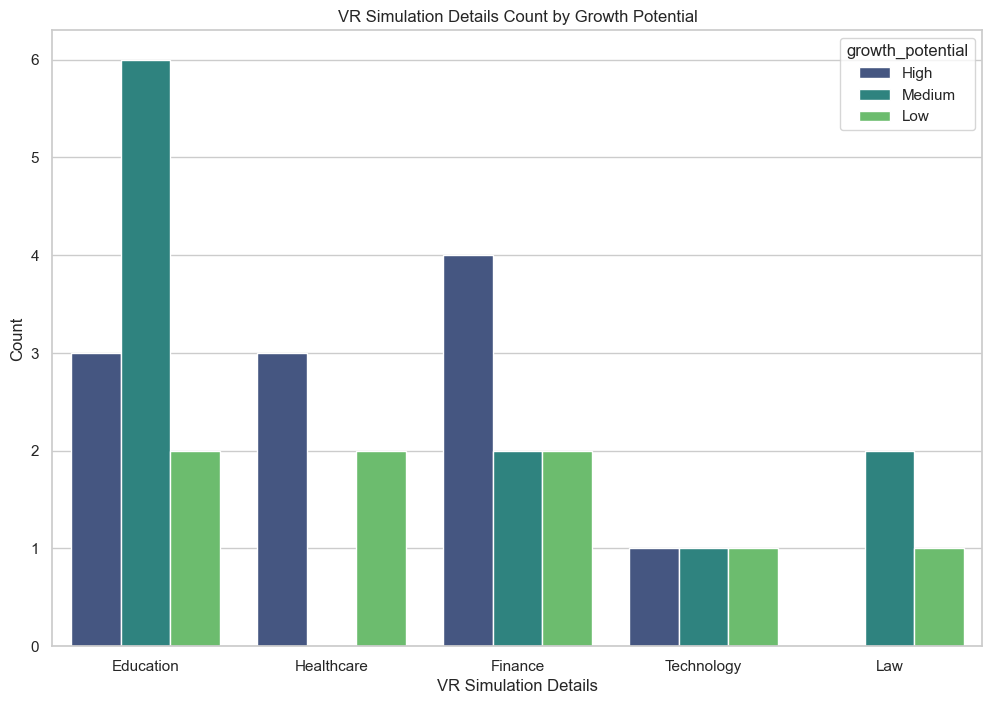

In [9]:
# Construct the SQL query
sql_query = "SELECT vr_id, VR_simulation_details, growth_potential, job_id FROM vr_experiences"

# Use pandas to read the SQL query result into a DataFrame
df = pd.read_sql(sql_query, con=cnx, columns=columns)


# Set the style for seaborn
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='VR_simulation_details', hue='growth_potential', data=df, palette='viridis')
plt.title('VR Simulation Details Count by Growth Potential')
plt.xlabel('VR Simulation Details')
plt.ylabel('Count')
plt.show()
df = pd.DataFrame(data)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='VR_simulation_details', hue='growth_potential', data=df, palette='viridis')
plt.title('VR Simulation Details Count by Growth Potential')
plt.xlabel('VR Simulation Details')
plt.ylabel('Count')
plt.show()


Education Dominates VR Simulations:

The majority of VR simulations are related to education, indicating a significant focus on incorporating virtual reality in educational settings.
High Growth Potential in Multiple Sectors:

VR simulations in healthcare, finance, technology, and education show a high growth potential, suggesting promising opportunities for development and investment in these sectors.
Healthcare and Finance Varied Growth:

While healthcare has a mix of high and low growth potential simulations, finance tends to have more simulations with high growth potential. This may imply that VR is perceived as more impactful or necessary in certain finance applications.
Medium Growth Potential in Education and Technology:

Education and technology sectors have a mix of medium growth potential VR simulations, indicating a moderate level of interest and development in these areas.
Law and Technology Have Lower Interest:

Simulations related to law and technology generally show lower growth potential, suggesting that the current focus or demand for VR in these fields might be comparatively lower.
Diverse Growth Potentials in Education:

Within the education sector, there is a diverse range of growth potentials, with simulations falling into the high, medium, and low categories. Further exploration is needed to understand the specific factors influencing growth potential in education.
Opportunity for Innovation in Low-Growth Areas:

Sectors like law and technology, with simulations showing low growth potential, might present opportunities for innovation and exploration to unlock new applications or improve existing VR solutions.
Overall Trends and Patterns:

The visualization highlights trends and patterns in the distribution of VR simulations, providing insights into where the industry is currently thriving and where there may be room for expansion and improvement.